# Operadores de píxel

Brillo
Contraste
Gamma

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

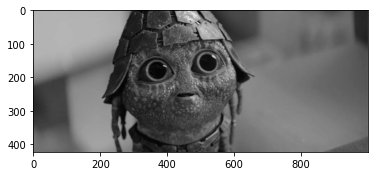

In [3]:
# Cargar una imagen en modo monocromático (un canal)
img = cv.imread('mib-alien.jpg', cv.IMREAD_GRAYSCALE)

# Mostrar la imagen
plt.imshow(img, cmap='gray')
plt.show()

#### Ejemplo: Cambio de contraste

In [4]:
def change_contrast(input_image:np.ndarray, contrast:int) -> np.ndarray: 
    """
    Parameters
    ----------
    img:np.ndarray 
        Grayscale image
    contrast: 
        % of contrast to increment
    
    Return
    ------
    img: (numpy.ndarray) with modified contrast
    """
    img_new = (1 + contrast / 100) * input_image
    # Clip trunca a lo que se le diga (0 a 255)
    np.clip(img_new, 0, 255, out = img_new)
    # Hay que castear a 8 bits   
    img_new = img_new.astype('uint8')         

    return img_new


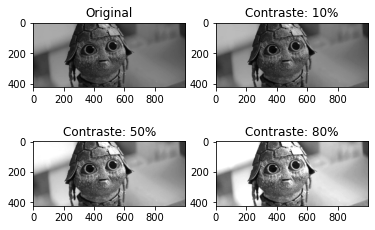

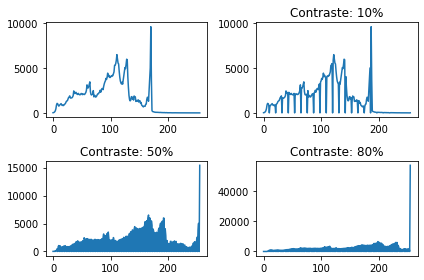

In [6]:
# Nueva figura
fig = plt.figure()

# Imagen original
ax1=plt.subplot(221)
ax1.imshow(img, cmap='gray', vmin=0, vmax=255)
ax1.set_title('Original')

hist1, bins1 = np.histogram(img.ravel(), 256, [0, 256])

# Modificamos contraste 10%
new_contrast = 10
img_mod = change_contrast(input_image=img, contrast=new_contrast)

ax2=plt.subplot(222)
ax2.imshow(img_mod, cmap='gray', vmin=0, vmax=255)
title_a = f'Contraste: {new_contrast}%'
ax2.set_title(title_a)

hist2,bins2 = np.histogram(img_mod.ravel(),256,[0,256])

# Modificamos contraste 50%
new_contrast = 50
img_mod = change_contrast(input_image=img, contrast=new_contrast)

ax3=plt.subplot(223)
ax3.imshow(img_mod, cmap='gray', vmin=0, vmax=255)
title_b = f'Contraste: {new_contrast}%'
ax3.set_title(title_b)

hist3,bins3 = np.histogram(img_mod.ravel(),256,[0,256])

# Modificamos contraste 80%
new_contrast = 80
img_mod = change_contrast(input_image=img, contrast=new_contrast)

ax4=plt.subplot(224)
ax4.imshow(img_mod, cmap='gray', vmin=0, vmax=255)
title_c = f'Contraste: {new_contrast}%'
ax4.set_title(title_c)

hist4,bins4 = np.histogram(img_mod.ravel(),256,[0,256])

plt.show()

# Nueva figura
fig = plt.figure()

# Histogramas de la imagen
plt.subplot(221), plt.plot(hist1), 
plt.subplot(222), plt.plot(hist2),plt.title(title_a)
plt.subplot(223), plt.plot(hist3),plt.title(title_b)
plt.subplot(224), plt.plot(hist4),plt.title(title_c)
plt.tight_layout()
plt.show()


#### Ejemplo: Cambio de brillo

In [7]:
def change_brightness(input_image:np.ndarray, bright:int) -> np.ndarray: 
    '''
    Parameters
    ----------
    input_image:np.ndarray 
        Grayscale image
    bright: 
        % of brightness to increment

    Return
    ------
    Modified image as np.ndarray 
    '''
    img_new = input_image + (255 * bright / 100)
    # Clip trunca a lo que se le diga (0 a 255)
    np.clip(img_new, 0, 255, out = img_new)
    # Hay que castear a 8 bits   
    img_new = img_new.astype('uint8')         

    return img_new

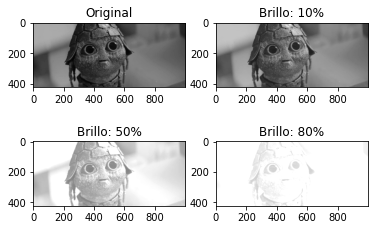

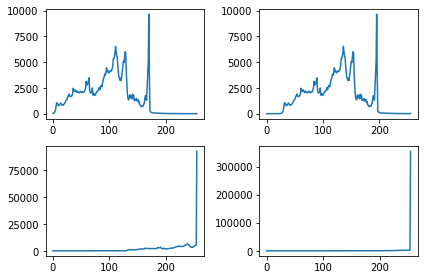

In [9]:
# Nueva figura
fig = plt.figure()

# Imagen original
ax1=plt.subplot(221)
ax1.imshow(img, cmap='gray', vmin=0, vmax=255)
ax1.set_title('Original')

# Modificamos brillo 10%
new_bright = 10
img_mod = change_brightness(input_image=img, bright=new_bright)
ax2=plt.subplot(222)
ax2.imshow(img_mod, cmap='gray', vmin=0, vmax=255)
ax2.set_title('Brillo: 10%')

hist2,bins2 = np.histogram(img_mod.ravel(), 256, [0, 256])

# Modificamos brillo 50%
new_bright = 50
img_mod = change_brightness(input_image=img, bright=new_bright)
ax3=plt.subplot(223)
ax3.imshow(img_mod, cmap='gray', vmin=0, vmax=255)
ax3.set_title('Brillo: 50%')

hist3,bins3 = np.histogram(img_mod.ravel(),256,[0,256])

# Modificamos brillo 80%
new_bright = 80
img_mod = change_brightness(input_image=img, bright=new_bright)
ax4=plt.subplot(224)
ax4.imshow(img_mod, cmap='gray', vmin=0, vmax=255)
ax4.set_title('Brillo: 80%')

hist4,bins4 = np.histogram(img_mod.ravel(),255,[0,255])

plt.show()

# Nueva figura
fig = plt.figure()

# Histogramas de la imagen
plt.subplot(221), plt.plot(hist1)
plt.subplot(222), plt.plot(hist2)
plt.subplot(223), plt.plot(hist3)
plt.subplot(224), plt.plot(hist4)
plt.tight_layout()
plt.show()


#### Corrección por Gamma

Para valores menores a 1 la luminancia se desplaza hacia tonos oscuros, si ajustamos con gamma > 1 nos movemos hacia los todos mas claros

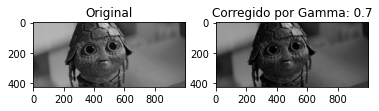

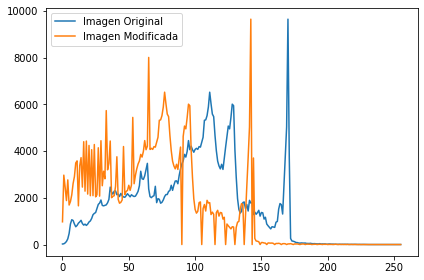

In [11]:

gamma = 0.7
inverse_gamma = 1.0 / gamma  # Invertir gamma

# Asegurarse de que la imagen esté en float32 y normalizada a [0, 1]
img_float = img.astype('float32') / 255.0

# Aplicar corrección gamma
img_mod = np.power(img_float, inverse_gamma)

# Convertir de vuelta a 8 bits y asegurarse de escalar correctamente
img_mod = np.uint8(img_mod * 255)

# Visualización de las imágenes
ax1 = plt.subplot(121)
ax1.set_title('Original')
plt.imshow(img, cmap='gray')
ax2 = plt.subplot(122)
ax2.set_title(f'Corregido por Gamma: {gamma}')
plt.imshow(img_mod, cmap='gray')
plt.show()

# Calculando los histogramas
hist1, _ = np.histogram(img, 256, [0, 256])
hist2, _ = np.histogram(img_mod, 256, [0, 256])

# Visualización de los histogramas
plt.figure()
plt.plot(hist1, label='Imagen Original')
plt.plot(hist2, label='Imagen Modificada')
plt.legend()
plt.tight_layout()
plt.show()



### Histograma 2D

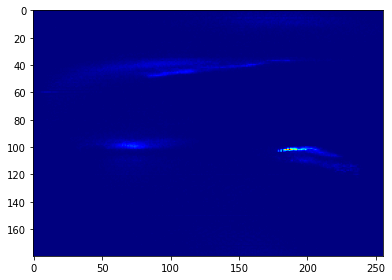

In [12]:
#img = cv.imread('mib-alien.jpg')
img = cv.imread('paisaje.png')
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
#hist = cv.calcHist([img], channels=[1, 2], mask=None, histSize=[256, 256], ranges=[0, 255, 0, 255])
hist = cv.calcHist([hsv], channels=[0, 2], mask=None, histSize=[180, 256], ranges=[0, 180, 0, 255])
plt.figure()
plt.imshow(hist, cmap='jet')
plt.tight_layout()
plt.show()